In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df=pd.read_excel("Order_details.xlsx")


In [25]:
df


,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26


In [50]:
print(
 df[df['Product']=="PRODUCT_75"]
)

Empty DataFrame
Columns: [Name, Email, Product, Transaction Date, y_pred_rf, y_pred_lr]
Index: []


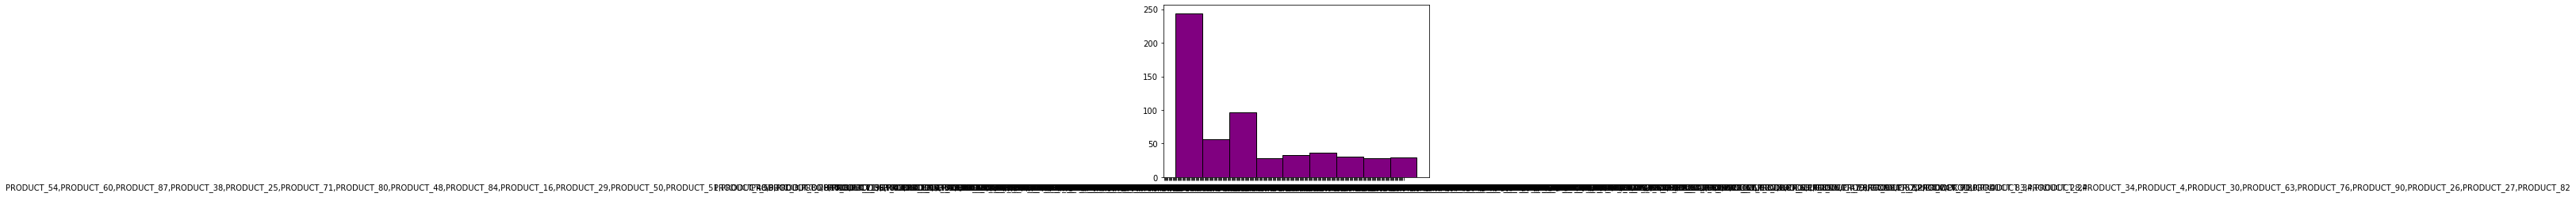

In [5]:
plt.hist(df["Product"], bins=9, align='right', color='purple', edgecolor='black')
plt.show()

In [8]:
ProductSales=df.groupby(['Email','Product']).count()['Name']
print(ProductSales)

Email                       Product                                    
PERSON_100@altajirglass.ae  PRODUCT_11,PRODUCT_54,PRODUCT_25,PRODUCT_80    1
PERSON_101@yahoo.co.in      PRODUCT_89                                     1
PERSON_102@yahoo.com        PRODUCT_27,PRODUCT_90                          1
PERSON_103@gmail.com        PRODUCT_12,PRODUCT_75                          1
PERSON_104@yahoo.co.in      PRODUCT_25,PRODUCT_48                          1
                                                                          ..
PERSON_97@gmail.com         PRODUCT_75                                     1
PERSON_98@gmail.com         PRODUCT_68                                     1
                            PRODUCT_75,PRODUCT_84                          1
PERSON_99@docon.in          PRODUCT_75,PRODUCT_27,PRODUCT_63               1
PERSON_9@outlook.com        PRODUCT_26                                     1
Name: Name, Length: 581, dtype: int64


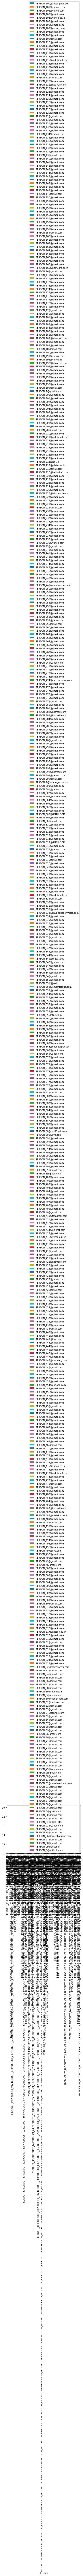

In [14]:
ProductSales.unstack(level=0).plot(kind='bar')
plt.legend(loc="lower right")

In [17]:
df.groupby('Product').sum()['Email']


Product
PRODUCT_11,PRODUCT_25                                                                                                                                                                                         PERSON_62@gmail.com
PRODUCT_11,PRODUCT_54,PRODUCT_25,PRODUCT_80                                                                                                                                                            PERSON_100@altajirglass.ae
PRODUCT_12                                                                                                                                                                      PERSON_170@gmail.comPERSON_190@gmail.comPERSON...
PRODUCT_12,PRODUCT_24                                                                                                                                                                                        PERSON_436@gmail.com
PRODUCT_12,PRODUCT_31                                                                   

In [35]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['Product'])
df['Product'] = enc.transform(df['Product'])
df


,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,194,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,194,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,143,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,143,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,88,01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,107,07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,219,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,90,07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,205,07/03/2021 23:59:26


In [36]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(df['Email'])
df['Email'] = enc.transform(df['Email'])
df

,Name,Email,Product,Transaction Date
0,PERSON_1,110,194,01/03/2021 00:47:26
1,PERSON_2,221,194,01/03/2021 02:04:07
2,PERSON_3,332,143,01/03/2021 09:10:43
3,PERSON_4,443,143,01/03/2021 09:49:48
4,PERSON_5,480,88,01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,468,107,07/03/2021 23:53:03
577,PERSON_523,469,219,07/03/2021 23:55:01
578,PERSON_523,469,90,07/03/2021 23:58:24
579,PERSON_524,470,205,07/03/2021 23:59:26


<AxesSubplot:title={'center':'Histogram for number of products ordered'}, xlabel='Email', ylabel='PRODUCT'>

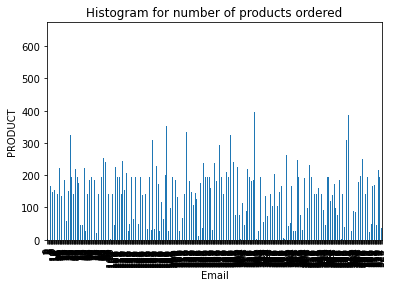

In [30]:
Total=df.groupby('Email').sum()['Product']
plt.xlabel('EMAIL')
plt.ylabel('PRODUCT')
plt.title('Histogram for number of products ordered')
Total.plot(kind='bar')

In [31]:
df['Transaction Date']

0      01/03/2021 00:47:26
1      01/03/2021 02:04:07
2      01/03/2021 09:10:43
3      01/03/2021 09:49:48
4      01/03/2021 10:56:46
              ...         
576    07/03/2021 23:53:03
577    07/03/2021 23:55:01
578    07/03/2021 23:58:24
579    07/03/2021 23:59:26
580    07/03/2021 23:59:19
Name: Transaction Date, Length: 581, dtype: object

In [6]:
pd.to_datetime(df['Transaction Date']).dt.day
pd.to_datetime(df['Transaction Date']).dt.month
df['Day']=pd.to_datetime(df['Transaction Date']).dt.day
df['Month']=pd.to_datetime(df['Transaction Date']).dt.month
df.head(40)

,Name,Email,Product,Transaction Date,Day,Month
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26,3,1
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07,3,1
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43,3,1
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48,3,1
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46,3,1
5,PERSON_6,PERSON_6@gmail.com,"PRODUCT_34,PRODUCT_66,PRODUCT_58,PRODUCT_83",01/03/2021 11:06:34,3,1
6,PERSON_7,PERSON_7@gmail.com,PRODUCT_75,01/03/2021 12:02:00,3,1
7,PERSON_8,PERSON_8@gmail.com,"PRODUCT_63,PRODUCT_90,PRODUCT_27,PRODUCT_5",01/03/2021 12:31:10,3,1
8,PERSON_9,PERSON_9@outlook.com,PRODUCT_26,01/03/2021 12:51:46,3,1
9,PERSON_10,PERSON_10@gmail.com,PRODUCT_63,01/03/2021 12:52:29,3,1


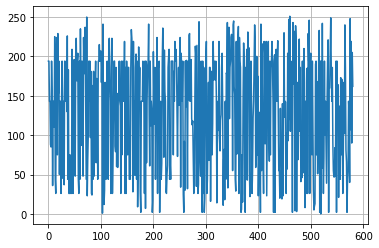

In [42]:
df.groupby('Day')['Product'].plot()
plt.grid()

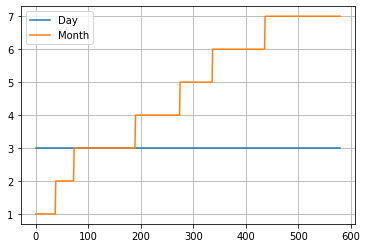

In [7]:
df.groupby('Day').plot()
plt.grid()

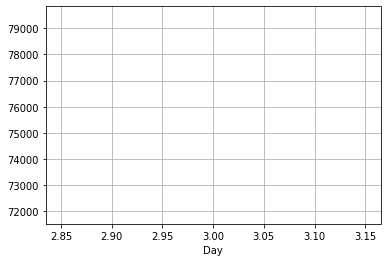

In [10]:
df.groupby('Day').sum()['Product'].plot()
plt.grid()


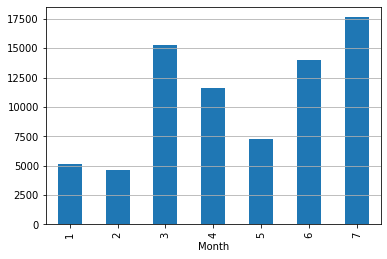

In [11]:
df.groupby('Month').sum()['Product'].plot(kind='bar')
plt.grid(axis='y')

In [21]:
pd.to_datetime(df['Transaction Date'])
df['time']=pd.to_datetime(df['Transaction Date']).dt.time
df.head(10)

,Name,Email,Product,Transaction Date,Day,Month,time
0,PERSON_1,PERSON_1@gmail.com,194,01/03/2021 00:47:26,3,1,00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,194,01/03/2021 02:04:07,3,1,02:04:07
2,PERSON_3,PERSON_3@gmail.com,143,01/03/2021 09:10:43,3,1,09:10:43
3,PERSON_4,PERSON_4@gmail.com,143,01/03/2021 09:49:48,3,1,09:49:48
4,PERSON_5,PERSON_5@gmail.com,88,01/03/2021 10:56:46,3,1,10:56:46
5,PERSON_6,PERSON_6@gmail.com,85,01/03/2021 11:06:34,3,1,11:06:34
6,PERSON_7,PERSON_7@gmail.com,194,01/03/2021 12:02:00,3,1,12:02:00
7,PERSON_8,PERSON_8@gmail.com,157,01/03/2021 12:31:10,3,1,12:31:10
8,PERSON_9,PERSON_9@outlook.com,36,01/03/2021 12:51:46,3,1,12:51:46
9,PERSON_10,PERSON_10@gmail.com,143,01/03/2021 12:52:29,3,1,12:52:29


In [33]:
date=pd.Timestamp.now()
print(date)

2022-07-11 23:31:03.277071


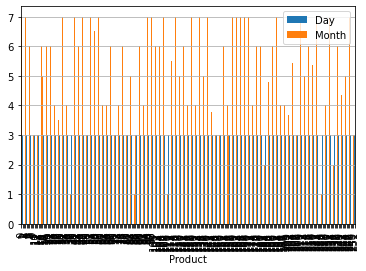

In [36]:
max=df.groupby('Product').mean()
max.plot(kind='bar')
plt.grid(axis='y')


In [40]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [43]:
df['Product']=df['Product'].str.strip()
df.dropna(axis=0,subset=['Name'],inplace=True)
df['Name']=df['Name'].astype('str')
df=df[~df['Name'].str.contains('C')]
df

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,"PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...",07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,PRODUCT_8,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,"PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...",07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,"PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...",07/03/2021 23:59:26


In [44]:
basket=(df[df['Product']=='Product34']
        .groupby(['Name','Product']).sum().unstack().reset_index().fillna(0)
        .set_index('Name'))
basket

Name


In [50]:
freq=apriori(basket_sets,min_support=0.07,use_colnames=True)
rules=association_rules(freq,metric="lift",min_threshold=1)
rules

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

In [6]:
seg=df[df['Product']=="PRODUCT_75"]
print(seg)

           Name                      Email     Product     Transaction Date
0      PERSON_1         PERSON_1@gmail.com  PRODUCT_75  01/03/2021 00:47:26
1      PERSON_2  PERSON_2@tataprojects.com  PRODUCT_75  01/03/2021 02:04:07
6      PERSON_7         PERSON_7@gmail.com  PRODUCT_75  01/03/2021 12:02:00
15    PERSON_16        PERSON_16@gmail.com  PRODUCT_75  01/03/2021 14:56:02
20    PERSON_21        PERSON_21@gmail.com  PRODUCT_75  01/03/2021 17:33:52
..          ...                        ...         ...                  ...
520  PERSON_474       PERSON_474@gmail.com  PRODUCT_75  07/03/2021 19:57:33
526  PERSON_478       PERSON_478@gmail.com  PRODUCT_75  07/03/2021 20:27:22
532  PERSON_482       PERSON_482@gmail.com  PRODUCT_75  07/03/2021 21:10:49
548  PERSON_497        PERSON_497@live.com  PRODUCT_75  07/03/2021 22:08:48
550  PERSON_499       PERSON_499@gmail.com  PRODUCT_75  07/03/2021 22:22:27

[74 rows x 4 columns]


In [8]:
mail=df[df['Email']=='@tataprojects.com']
print(mail)

Empty DataFrame
Columns: [Name, Email, Product, Transaction Date]
Index: []


(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.0, 19.4, 38.8, 58.199999999999996, 77.6, 97.0,
        116.39999999999999, 135.79999999999998, 155.2, 174.6, 194.0],
       dtype=object),
 <a list of 4 BarContainer objects>)

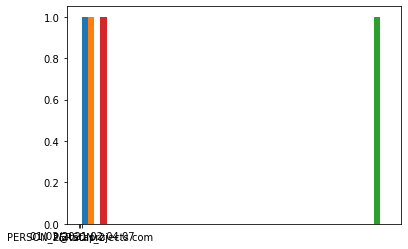

In [31]:
mails=df.loc[df['Email'].str.contains("@tataprojects.com")]
plt.hist(mails)

In [13]:
mail1=df.loc[df['Email'].str.contains("ntpc.co.in")]
print(mail1)

         Name                 Email  \
34  PERSON_35  PERSON_35@ntpc.co.in   
35  PERSON_35  PERSON_35@ntpc.co.in   

                                              Product     Transaction Date  
34                                         PRODUCT_75  01/03/2021 22:43:37  
35  PRODUCT_57,PRODUCT_90,PRODUCT_66,PRODUCT_58,PR...  01/03/2021 22:50:54  


(array([[2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 2., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 4 BarContainer objects>)

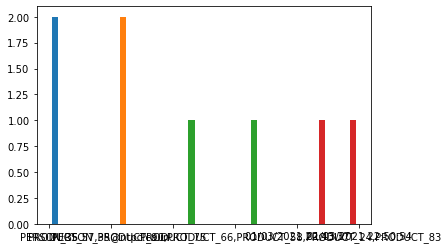

In [35]:
plt.hist(mail1)

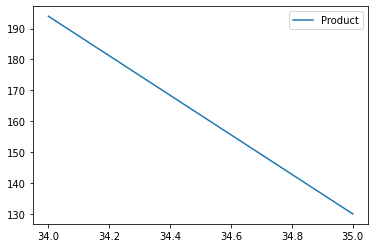

In [46]:
mail2=df.loc[df['Email'].str.contains("ntpc.co.in")]
mail2.plot()
plt.show()

In [24]:
result = df.groupby('Email').agg({'Product': ['mean', 'min', 'max']})
print(result)

                           Product          
                              mean  min  max
Email                                       
PERSON_100@altajirglass.ae     1.0    1    1
PERSON_101@yahoo.co.in       241.0  241  241
PERSON_102@yahoo.com          54.0   54   54
PERSON_103@gmail.com          12.0   12   12
PERSON_104@yahoo.co.in        30.0   30   30
...                            ...  ...  ...
PERSON_96@greenkogroup.com   194.0  194  194
PERSON_97@gmail.com          194.0  194  194
PERSON_98@gmail.com          187.0  167  207
PERSON_99@docon.in           197.0  197  197
PERSON_9@outlook.com          36.0   36   36

[525 rows x 3 columns]


In [25]:
df[['Product']].idxmax()

Product    460
dtype: int64

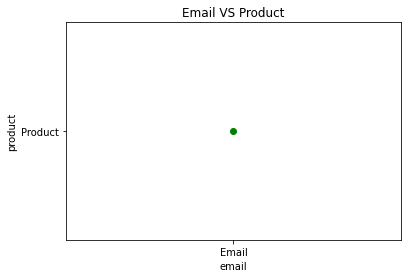

In [29]:
plt.scatter("Email","Product",color="green")
plt.xlabel('email')
plt.ylabel('product')
plt.title('Email VS Product')
plt.show()

In [30]:
df.query("Email !=['@tataprojects.com']")

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,194,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,194,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,143,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,143,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,88,01/03/2021 10:56:46
...,...,...,...,...
576,PERSON_522,PERSON_522@gmail.com,107,07/03/2021 23:53:03
577,PERSON_523,PERSON_523@gmail.com,219,07/03/2021 23:55:01
578,PERSON_523,PERSON_523@gmail.com,90,07/03/2021 23:58:24
579,PERSON_524,PERSON_524@gmail.com,205,07/03/2021 23:59:26


In [40]:
plt.hist(x = 'Product', height = 'Month')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U5')) -> None

<Figure size 432x288 with 1 Axes>

In [41]:
df.describe()

,Product
count,581.000000
mean,130.254733
std,72.663588
min,0.000000
25%,59.000000
50%,143.000000
75%,194.000000
max,251.000000


In [42]:
df["Product"].mean()

130.25473321858863

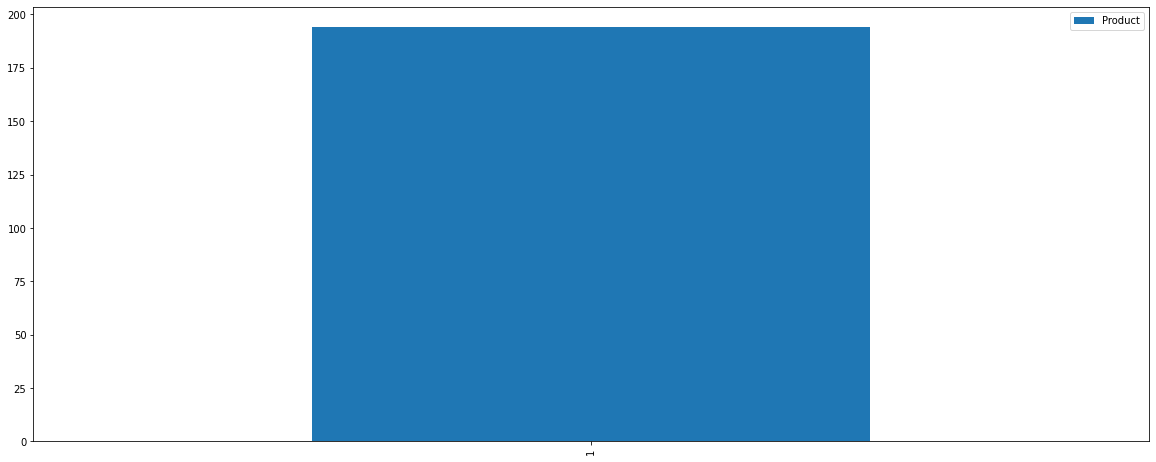

In [47]:
mails.head(5).plot(kind='bar', figsize=(20,8))
plt.show()

In [49]:
writer = pd.ExcelWriter('Order_details.xlsx', engine='xlsxwriter')
df.to_excel(writer, index=False, sheet_name='report')
workbook = writer.bookworksheet = writer.sheets['report']

In [55]:
header_fmt = workbook({'bold': True})
worksheet.set_row(0, None, header_fmt)

TypeError: 'Worksheet' object is not callable

In [57]:
df.shape

(581, 4)

In [65]:
bas=(df[df['Product']=="88"]).groupby(['Name','Email'])
print(bas)

In [26]:
def Snippet_136():
    print()
    print('**How we can check model\'s AUC score using cross validation in Python**')

    # load libraries
    from sklearn.model_selection import cross_val_score
    from sklearn.tree import DecisionTreeClassifier
    from sklearn import datasets

    #Loading Cancer Dataset
    prod = datasets.Order_details()

    # Create features and target
    X = prod.data; print(); print(X)
    y = prod.target; print(); print(y)

    # Create Decision Tree model
    dtree = DecisionTreeClassifier()

    # Cross-validate model using accuracy
    print(); print(cross_val_score(dtree, X, y, scoring="roc_auc", cv = 7))
    mean_score = cross_val_score(dtree, X, y, scoring="roc_auc", cv = 7).mean()
    std_score = cross_val_score(dtree, X, y, scoring="roc_auc", cv = 7).std()
    print(); print(mean_score)
    print(); print(std_score)

Snippet_136()


**How we can check model's AUC score using cross validation in Python**


AttributeError: module 'sklearn.datasets' has no attribute 'Order_details'

In [ ]:
model=LogisticRegression(max_iter=200,c=100000)
accuracies=cross_val_score(model)

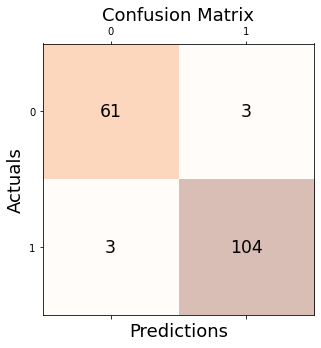

In [53]:
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
#
# Standardize the data set
#

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(X_train, y_train)
#
# Get the predictions
#
y_pred = svc.predict(X_test)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [37]:
thresh = 0.5
df['y_pred_rf'] = (df.Product > 0.5).astype('int')
df['y_pred_lr'] = (df.Email > 0.5).astype('int')
df.head()

,Name,Email,Product,Transaction Date,y_pred_rf,y_pred_lr
0,PERSON_1,110,194,01/03/2021 00:47:26,1,1
1,PERSON_2,221,194,01/03/2021 02:04:07,1,1
2,PERSON_3,332,143,01/03/2021 09:10:43,1,1
3,PERSON_4,443,143,01/03/2021 09:49:48,1,1
4,PERSON_5,480,88,01/03/2021 10:56:46,1,1


In [38]:
def compute_tp_tn_fn_fp(y_act, y_pred):
	'''
	True positive - actual = 1, predicted = 1
	False positive - actual = 1, predicted = 0
	False negative - actual = 0, predicted = 1
	True negative - actual = 0, predicted = 0
	'''
	tp = sum((y_act == 1) & (y_pred == 1))
	tn = sum((y_act == 0) & (y_pred == 0))
	fn = sum((y_act == 1) & (y_pred == 0))
	fp = sum((y_act == 0) & (y_pred == 1))
	return tp, tn, fp, fn

In [40]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_pred_rf, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 579
TN for Logistic Reg : 0
FP for Logistic Reg : 1
FN for Logistic Reg : 1


In [43]:

from sklearn.metrics import recall_score

In [44]:
def compute_f1_score(y_true, y_pred):
    # calculates the F1 score
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    precision = compute_precision(tp, fp)/100
    recall = compute_recall(tp, fn)/100
    f1_score = (2*precision*recall)/ (precision + recall)
    return f1_score

In [46]:
def compute_precision(tp, fp):
	'''
	Precision = TP  / FP + TP 

	'''
	return (tp  * 100)/ float( tp + fp)

In [48]:
def compute_recall(tp, fn):
	'''
	Recall = TP /FN + TP 

	'''
	return (tp  * 100)/ float( tp + fn)

In [49]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_pred_rf, 
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_pred_lr, 
                                                             df.y_pred_rf))

F1 score for Logistic Regression : 0.9982758620689656
F1 score for Random Forest : 0.9982758620689656
